In [82]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
#### Packages for Model Diagonistics
from sklearn.metrics import r2_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, classification_report

In [83]:
# Load the dataset (assuming it's in a CSV file)
bank_data = pd.read_csv("C:/Users/1234/Downloads/bank-full.csv")

# Explore the dataset
print(bank_data.head())

   Age           Job Marital Status  Education Default  Balance Housing Loan  \
0   58    management        married   tertiary      no     2143     yes   no   
1   44    technician         single  secondary      no       29     yes   no   
2   33  entrepreneur        married  secondary      no        2     yes  yes   
3   47    bluecollar        married    unknown      no     1506     yes   no   
4   33       unknown         single    unknown      no        1      no   no   

   Contact  Day Month  Duration  Campaign  Pdays  Previous Poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


In [109]:
df1=bank_data.copy()

In [110]:
## Encodeing 
dummy = pd.get_dummies(df1[['Job','Marital Status','Education','Contact','Month','Poutcome']]).astype('int')
dummy.columns

Index(['Job_admin.', 'Job_bluecollar', 'Job_entrepreneur', 'Job_housemaid',
       'Job_management', 'Job_retired', 'Job_self-employed', 'Job_services',
       'Job_student', 'Job_technician', 'Job_unemployed', 'Job_unknown',
       'Marital Status_divorced', 'Marital Status_married',
       'Marital Status_single', 'Education_primary', 'Education_secondary',
       'Education_tertiary', 'Education_unknown', 'Contact_cellular',
       'Contact_telephone', 'Contact_unknown', 'Month_apr', 'Month_aug',
       'Month_dec', 'Month_feb', 'Month_jan', 'Month_jul', 'Month_jun',
       'Month_mar', 'Month_may', 'Month_nov', 'Month_oct', 'Month_sep',
       'Poutcome_failure', 'Poutcome_other', 'Poutcome_success',
       'Poutcome_unknown'],
      dtype='object')

In [111]:
## Replace 'yes' by 1 and 'no' by 0
df1['Default'] = df1['Default'].replace(to_replace={'yes':1, 'no':0})
df1['Housing'] = df1['Housing'].replace(to_replace={'yes':1, 'no':0})
df1['Loan'] = df1['Loan'].replace(to_replace={'yes':1, 'no':0})
df1['y'] = df1['y'].replace(to_replace={'yes':1, 'no':0})

In [112]:
df2 = pd.concat([df1,dummy],axis = 1)

In [113]:
df2.columns

Index(['Age', 'Job', 'Marital Status', 'Education', 'Default', 'Balance',
       'Housing', 'Loan', 'Contact', 'Day', 'Month', 'Duration', 'Campaign',
       'Pdays', 'Previous', 'Poutcome', 'y', 'Job_admin.', 'Job_bluecollar',
       'Job_entrepreneur', 'Job_housemaid', 'Job_management', 'Job_retired',
       'Job_self-employed', 'Job_services', 'Job_student', 'Job_technician',
       'Job_unemployed', 'Job_unknown', 'Marital Status_divorced',
       'Marital Status_married', 'Marital Status_single', 'Education_primary',
       'Education_secondary', 'Education_tertiary', 'Education_unknown',
       'Contact_cellular', 'Contact_telephone', 'Contact_unknown', 'Month_apr',
       'Month_aug', 'Month_dec', 'Month_feb', 'Month_jan', 'Month_jul',
       'Month_jun', 'Month_mar', 'Month_may', 'Month_nov', 'Month_oct',
       'Month_sep', 'Poutcome_failure', 'Poutcome_other', 'Poutcome_success',
       'Poutcome_unknown'],
      dtype='object')

In [114]:
X = df2 [['Age', 'Default', 'Balance',
       'Housing', 'Loan', 'Day', 'Duration', 'Campaign',
       'Pdays', 'Previous', 'Job_admin.', 'Job_bluecollar',
       'Job_entrepreneur', 'Job_housemaid', 'Job_management', 'Job_retired',
       'Job_self-employed', 'Job_services', 'Job_student', 'Job_technician',
       'Job_unemployed', 'Job_unknown', 'Marital Status_divorced',
       'Marital Status_married', 'Marital Status_single', 'Education_primary',
       'Education_secondary', 'Education_tertiary', 'Education_unknown',
       'Contact_cellular', 'Contact_telephone', 'Contact_unknown', 'Month_apr',
       'Month_aug', 'Month_dec', 'Month_feb', 'Month_jan', 'Month_jul',
       'Month_jun', 'Month_mar', 'Month_may', 'Month_nov', 'Month_oct',
       'Month_sep', 'Poutcome_failure', 'Poutcome_other', 'Poutcome_success',
       'Poutcome_unknown']]
X.head()

Age  Default  Balance  Housing  Loan  Day  Duration  Campaign  Pdays  \
0   58        0     2143        1     0    5       261         1     -1   
1   44        0       29        1     0    5       151         1     -1   
2   33        0        2        1     1    5        76         1     -1   
3   47        0     1506        1     0    5        92         1     -1   
4   33        0        1        0     0    5       198         1     -1   

   Previous  ...  Month_jun  Month_mar  Month_may  Month_nov  Month_oct  \
0         0  ...          0          0          1          0          0   
1         0  ...          0          0          1          0          0   
2         0  ...          0          0          1          0          0   
3         0  ...          0          0          1          0          0   
4         0  ...          0          0          1          0          0   

   Month_sep  Poutcome_failure  Poutcome_other  Poutcome_success  \
0          0                 0               0                 0   
1          0                 0               0                 0   
2          0                 0               0                 0   
3          0                 0               0                 0   
4          0                 0               0                 0   

   Poutcome_unknown  
0                 1  
1                 1  
2                 1  
3                 1  
4                 1  

[5 rows x 48 columns]

In [115]:
y = df2 ['y']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

In [116]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=.75,random_state=1234)

In [117]:
X_train.head(2)

Age  Default  Balance  Housing  Loan  Day  Duration  Campaign  Pdays  \
40961   29        0       41        1     0   13       148         2     -1   
34525   41        0      121        1     0    5       456         1    287   

       Previous  ...  Month_jun  Month_mar  Month_may  Month_nov  Month_oct  \
40961         0  ...          0          0          0          0          0   
34525         1  ...          0          0          1          0          0   

       Month_sep  Poutcome_failure  Poutcome_other  Poutcome_success  \
40961          0                 0               0                 0   
34525          0                 1               0                 0   

       Poutcome_unknown  
40961                 1  
34525                 0  

[2 rows x 48 columns]

In [118]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)  # apply scaling on training
pipe.score(X_test, y_test)  # apply scaling on testing data, without leaking training data.

0.9030345925860391

In [119]:
lg_model = LogisticRegression()

In [120]:
lg_model_fit = lg_model.fit(X_train,y_train)

C:\Users\1234\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [121]:
pred = lg_model_fit.predict(X_test)
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [122]:
acc = accuracy_score(y_test,pred)
prc = precision_score(y_test,pred)
clf = classification_report(y_test,pred)
conf = confusion_matrix(y_test,pred)
print ("The Accuracy score - ", acc)
print ("The Precision Score -", prc)
print ("Classification Report -", clf)
print ("Confusion Matrix -", conf)

The Accuracy score -  0.8917986375298593
The Precision Score - 0.636986301369863
Classification Report -               precision    recall  f1-score   support

           0       0.90      0.99      0.94     10000
           1       0.64      0.14      0.23      1303

    accuracy                           0.89     11303
   macro avg       0.77      0.57      0.59     11303
weighted avg       0.87      0.89      0.86     11303

Confusion Matrix - [[9894  106]
 [1117  186]]


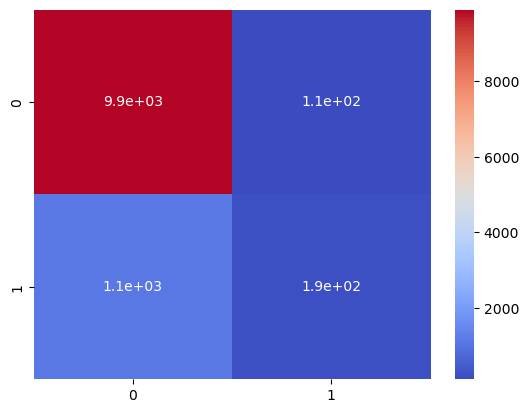

In [126]:
sns.heatmap(conf, annot=True, cmap = 'coolwarm')
plt.show()
